
<h1>Linear Regression</h1>

In a regression problem, we aim to predict the output of a continuous value, like a price or a probability. Contrast this with a classification problem, where we aim to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

A simple example of a linear function can help us understand the basic mechanism behind TensorFlow.
For the first part we will use a sample dataset, and then we'll use TensorFlow to adjust and get the right parameters. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars.



### Import requier libraries

In [3]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import matplotlib.patches as mpaches
import seaborn sns
import tensorflow as tf
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)


In [5]:
# version of tensorflow
tf.__version__

'2.3.0'

<h2>Understanding the Data</h2>

<h3><code>FuelConsumption.csv</code>:</h3>
We have downloaded a fuel consumption dataset, <b><code>FuelConsumption.csv</code></b>, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. <a href="http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64">Dataset source</a>

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [7]:
#read the data
dataset =pd.read_csv('FuelConsumptionCo2.csv')
dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


We want to use Linear regresion to predit Co2Emission of cars based on their engine size. X value for our model in 'ENGINESIZE' and target value or y in 'CO2EMISSION'.

In [10]:
train_X= np.asanyarray(dataset[['ENGINESIZE']])
train_y=np.asanyarray(dataset[['CO2EMISSIONS']])

now we initialized the coefficient and intercept with any random guess, and then we define the linear function

In [11]:
a = tf.Variable(10.0)
b = tf.Variable(20.2)

def h(x):
    y  = a*x + b
    return y

In linear regression  we minimize the squared error of the difference between the predicted values(obtained from the equation) and the target values (the data that we have). In other words we want to minimize the square of the predicted values minus the target value. So we define the equation to be minimized as loss.

To find value of our loss, we use <b>tf.reduce_mean()</b>. This function finds the mean of a multidimensional tensor, and the result can have a different dimension.

In [12]:
def loss_function(y,train_y):
    return tf.reduce_mean(tf.square(y - train_y))

In [15]:
learning_rate = 0.01
train_data = []
loss_values =[]
# steps of looping through all your data to update the parameters
training_epochs = 200

# train model
for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted = h(train_X)
        loss_value = loss_function(train_y,y_predicted)
        loss_values.append(loss_value)

        # get gradients
        gradients = tape.gradient(loss_value, [b,a])
        
        # compute and adjust weights
        b.assign_sub(gradients[0]*learning_rate)
        a.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([a, b])



In [16]:
#Lets plot the loss values to see how it has changed during the training:

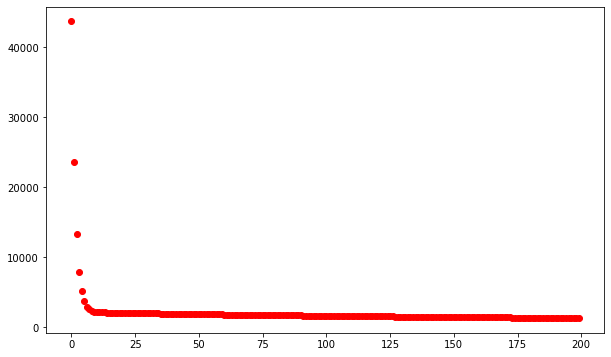

In [17]:
plt.plot(loss_values, 'ro')

NameError: name 'mpatches' is not defined

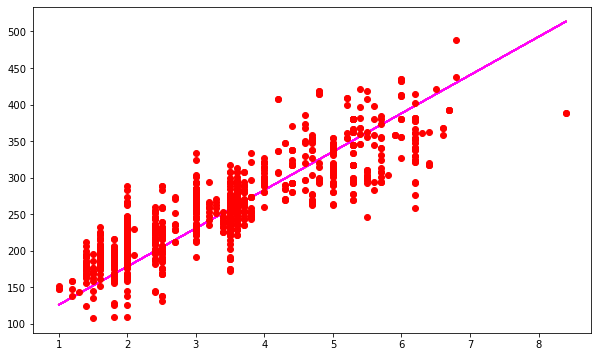

In [21]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_X)
    line = plt.plot(train_X, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_X, train_y, 'ro')
green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()